# Linear regression

In [19]:
Import all the modules you will need in this notebook here:

In [20]:
# exercise 0
# Put your solution here!
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import abline_plot


We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [21]:
# exercise 1
def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename
    
# Put your solution here!
file = get_path('fram.txt')
fram = pd.read_csv(file, sep='\t')
fram.describe()
fram.head()

,ID,SEX,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,YRS_CHD,DEATH,YRS_DTH,CAUSE
0,4988,female,57,135,186,NaN,120,150,0,1,pre,7,11,unknown
1,3001,female,60,123,165,NaN,100,167,25,0,16,10,17,unknown
2,5079,female,54,115,140,NaN,90,213,5,0,8,8,13,unknown
3,5162,female,52,102,170,NaN,104,280,15,0,10,7,11,unknown
4,4672,female,45,99,185,NaN,105,326,20,0,8,10,17,unknown


Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [22]:
# exercise 2
# Put your solution here!
def rescale(series):
    # center data
    center = series - series.mean()

    #normalize data
    norm = center / (2 * series.std())

    return norm
    

Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [23]:
# exercise 3
# Put your solution here!
df = fram.copy()
df.drop('CAUSE', axis=1, inplace=True)

for col in df.columns[2:]:
    if fram[col].dtype != object:
        fram['s' + col] = rescale(fram[col])

fram.head()

Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [24]:
# exercise 4
# Put your solution here!
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL', data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           4.13e-40
Time:                        17:06:36   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      84.9737      5.782     14.697      

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [40]:
# exercise 5
# Put your solution here!
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE', data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.961e+31
Date:                Tue, 28 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:23:35   Log-Likelihood:                 22342.
No. Observations:                 767   AIC:                        -4.466e+04
Df Residuals:                     757   BIC:                        -4.462e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     131.9807   2.58e-15   5.11e+16      

How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***

With the inclusion of age, the explanatory power of the model (described by R-squared) increased from 0.125 to 0.146, which is a difference of 0.021 (2.1 percent). Since the variables are standardized, the variables that explain the target variable the most, can be identified by looking for the highest coefficients. In this case that is weight (sFRW) followed by age (sAGE) and cholesterol (sCHOL).
***

Try to add to the model all the interactions with other variables. 

In [47]:
# exercise 6
# Put your solution here!
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sFRW:SEX + sCHOL:sFRW + sCHOL:SEX + sAGE + sAGE:sFRW + sAGE:SEX + sAGE:sCHOL', data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     24.52
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           4.92e-43
Time:                        17:44:28   Log-Likelihood:                -6509.9
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1383   BIC:                         1.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           150.5439      1.00

Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

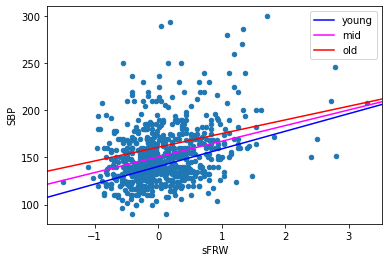

In [49]:
# exercise 7
# Put your solution here!
p = fit.params
fram[fram.SEX=='female'].plot.scatter('sFRW', 'SBP')

abline_plot(intercept=p.Intercept - p['sAGE'], slope=p.sFRW - p['sAGE:sFRW'],ax=plt.gca(), color='blue', label='young')
abline_plot(intercept=p.Intercept, slope=p.sFRW,ax=plt.gca(), color='magenta', label='mid')
abline_plot(intercept=p.Intercept + p['sAGE'], slope=p.sFRW + p['sAGE:sFRW'],ax=plt.gca(), color='red', label='old')

plt.legend()

How does the dependence of blood pressure on weight change as a person gets older?
***

As can be seen from the visualization, the slope seems to be steepest on young people, and it seems to flatten a bit as the age increases. So it seems like dependence of blood pressure on weight change decreases as a person gets older.

***

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     16.50
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           2.99e-40
Time:                        17:59:15   Log-Likelihood:                -6508.6
No. Observations:                1394   AIC:                         1.305e+04
Df Residuals:                    1378   BIC:                         1.313e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           151.3182      1.16

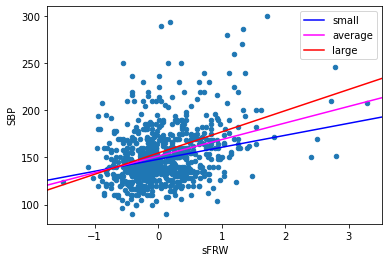

In [54]:
# exercise 8
# Put your solution here!
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sFRW:SEX + sCHOL:sFRW + sCHOL:SEX + sAGE + sAGE:sFRW + sAGE:SEX + sAGE:sCHOL + sCIG + sCIG:sAGE +  sCIG:sFRW + sCIG:sCHOL + sCIG:SEX', data=fram).fit()

p = fit.params
fram[fram.SEX=='female'].plot.scatter('sFRW', 'SBP')

abline_plot(intercept=p.Intercept - p['sCHOL'], slope=p.sFRW - p['sCHOL:sFRW'],ax=plt.gca(), color='blue', label='small')
abline_plot(intercept=p.Intercept, slope=p.sFRW,ax=plt.gca(), color='magenta', label='average')
abline_plot(intercept=p.Intercept + p['sCHOL'], slope=p.sFRW + p['sCHOL:sFRW'],ax=plt.gca(), color='red', label='large')

print(fit.summary())
plt.legend()



How does the model and its accuracy look?

***

According to the model, large amounts of cholesterol seem to increase blood pressure the most when a person is overweight. When cholesterol levels are lower, so is the blood pressure. Model's accuracy is not very good, since it has r-squared score of 0.152, which means that it only explains 15.2 percent of what it was supposed to explain. This score is only 0.1 percent higher than in previous model without the cigarette variable. This means that cigarettes variable does not make much of a difference in this model, meaning that it is not statistically significant.

***

# Logistic regression

In [29]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [60]:
# exercise 9
# Put your solution here!
fram['HIGH_BP'] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP.head()
fram.HIGH_BP = fram.HIGH_BP.map(int)
fram.head()

fit = smf.glm(formula='HIGH_BP ~ sFRW + SEX + SEX:sFRW', data=fram, family=sm.families.Binomial(statsmodels.genmod.families.links.logit)).fit()
fit.summary()
fit.params

error_rate_orig = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))


C:\Users\Eetu\AppData\Local\Temp/ipykernel_10628/3964160094.py:8: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  fit = smf.glm(formula='HIGH_BP ~ sFRW + SEX + SEX:sFRW', data=fram, family=sm.families.Binomial(statsmodels.genmod.families.links.logit)).fit()


Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [79]:
# exercise 10
# Put your solution here!
fit = smf.glm(formula='HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + sAGE:SEX', data=fram, family=sm.families.Binomial(statsmodels.genmod.families.links.logit)).fit()
fit.summary()
fit.params

error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))

C:\Users\Eetu\AppData\Local\Temp/ipykernel_10628/2618278997.py:3: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  fit = smf.glm(formula='HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + sAGE:SEX', data=fram, family=sm.families.Binomial(statsmodels.genmod.families.links.logit)).fit()


Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

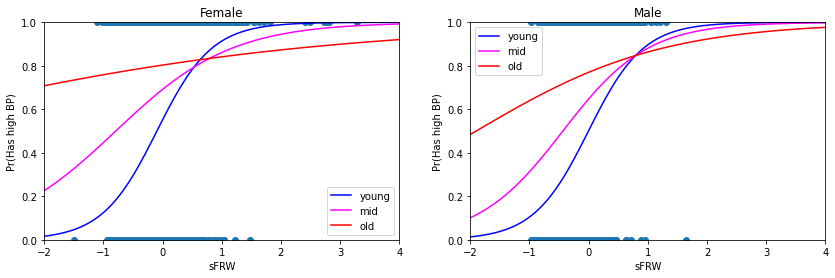

In [86]:
# exercise 11

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

# Put your solution here!

# 2 subplots with y-limit 0 to 1 because of standardization of data. 
fig, ax = plt.subplots(1,2, subplot_kw={"xlim": (-2, 4), "ylim": (0, 1),
"xlabel": "sFRW", "ylabel": "Pr(Has high BP)"},
figsize=(14, 4))

# Female data on axe 0, male data on axe 1
ax[0].set_title('Female')
ax[1].set_title('Male')
# Scatter data
ax[0].scatter(fram.sFRW[(fram.SEX=='female')], fram.HIGH_BP[(fram.SEX=='female')])
ax[1].scatter(fram.sFRW[(fram.SEX=='male')], fram.HIGH_BP[(fram.SEX=='male')])

X = np.linspace(-2, 4, 100)
p = fit.params

# Plot female data to axe 0
ax[0].plot(X, logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"] -
p["sAGE:sFRW"]) - p['sAGE'] +  + p.Intercept), color="blue", label="young")
ax[0].plot(X, logistic(X*(p.sFRW) + p.Intercept), color="magenta", label="mid")
ax[0].plot(X, logistic(X*(p.sFRW + p["sAGE:sFRW"]) + p['sAGE'] + p.Intercept), color="red", label="old")

# Plot male data to axe 1
ax[1].plot(X, logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"] -
p["sAGE:sFRW"]) - p['sAGE'] + p["SEX[T.male]"] + p.Intercept), color="blue", label="young")
ax[1].plot(X, logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"])+ p["SEX[T.male]"] + p.Intercept), color="magenta", label="mid")
ax[1].plot(X, logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"] +
p["sAGE:sFRW"]) + p['sAGE'] + p["SEX[T.male]"] + p.Intercept), color="red", label="old")

ax[0].legend()
ax[1].legend()

How do the models with different ages and genders differ from each other?

***
They dont differ much. Except that women seem to have higher blood pressure with higher weight than men.
***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [104]:
# exercise 12
# Put your solution here!
def train_test_split(df, train_fraction=0.8):
    train = df.sample(frac=train_fraction)
    return train, df.drop(train.index)

print(train_test_split(df))

(        ID     SEX  AGE  FRW  SBP  SBP10  DBP  CHOL  CIG  CHD YRS_CHD  DEATH  \
1141  4328    male   46   85  124  138.0   78   250    5    0      18      0   
439   4278  female   52   97  210  180.0  120   250    5    0      18      0   
876   4114    male   48  109  118  110.0   88   243    0    0      18      0   
1379  4987    male   60  122  150    NaN  100   180    0    0      16     10   
478   5636  female   49   94  178  164.0   94   363    0    0      18      0   
...    ...     ...  ...  ...  ...    ...  ...   ...  ...  ...     ...    ...   
476   5680  female   49   94  120    NaN   80   207   10    0      16      0   
781   5798    male   50  119  190  208.0  104   221    0    0      18      0   
454   4118  female   50   96  130  134.0   94   212    0    0      18      0   
1261  1596    male   56   97  140    NaN   92   191   20    5       7     10   
1107  5347    male   46   90  114  134.0   76   192   20    0      18      0   

      YRS_DTH  
1141       18  
439   

Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [105]:
# exercise 13
np.random.seed(1)
#Put your solution here!
error_model = []
error_null=[]
for i in range(100):
    train, test = train_test_split(fram)
    fit = smf.glm(formula='HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + sAGE:SEX', data=train, family=sm.families.Binomial()).fit()
    pred = fit.predict(test)
    error_model.append(np.mean(((pred < 0.5) & (test.HIGH_BP==1)) |
                 ((pred > 0.5) & (test.HIGH_BP==0))))
    error_null.append((1 - test.HIGH_BP).mean())

statsmodels.stats.stattools.stats.mannwhitneyu(error_model, error_null, alternative="two-sided")

0.3311827956989248 0.3488530465949821


MannwhitneyuResult(statistic=3020.0, pvalue=1.2819846293843994e-06)

## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [111]:
# exercise 14
# Put your solution here!
fram.head()

fram['hasCHD'] = (fram['CHD'] > 0)
fram['hasCHD']
# Convert booleans to integers
fram['hasCHD'] = fram['hasCHD'].map(int)
fram['hasCHD'].mean()

0.22022955523672882

Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [114]:
# exercise 15
# Put your solution here!
fit = smf.glm(formula='hasCHD ~ sFRW + sCHOL + sCIG + sFRW:sCHOL + sFRW:sCIG + sCHOL:sFRW + sCHOL:sCIG + sCIG:sFRW + sCIG:sCHOL', data=fram, family=sm.families.Binomial()).fit()
pred = fit.predict(fram)
err = []
err.append(np.mean(((pred < 0.5) & (fram.hasCHD==1)) |
                 ((pred > 0.5) & (fram.hasCHD==0))))
error_rate = pd.Series(err).mean()

0.22022955523672882

Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

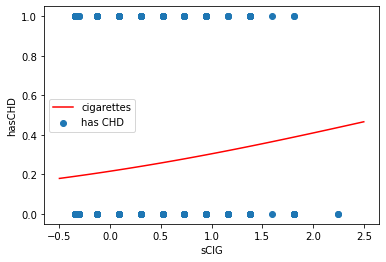

In [139]:
# exercise 16
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))
# Put your solution here!
fit.summary()
# Most important explanator (highest coef) is CIG
plt.scatter(fram.sCIG, fram.hasCHD, label='has CHD')

p = fit.params
X=np.linspace(-0.5, 2.5, 100)
plt.plot(X, logistic(X*p['sCIG'] + p.Intercept), label = 'cigarettes', color='red')

plt.xlabel('sCIG')
plt.ylabel('hasCHD')
plt.legend()

Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***
Since the error rate is around 22 percent, it means that the model is correct 78 percent of the time. In my opinion this is a good prediction accuracy and this model is viable.
***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [161]:
# exercise 17
# Put your solution here!
point = {}
# Normalize data by dividing by 2 sigma
chol = (200 - fram.CHOL.mean()) / (fram.CHOL.std() * 2)
cigs = (17 - fram.CIG.mean()) / (fram.CIG.std() * 2)
weight = (100 - fram.FRW.mean()) / (fram.FRW.std() * 2)

point['sCIG'] = cigs
point['sCHOL'] = chol
point['sFRW'] = weight

predicted = fit.predict(point).astype(float)[0]
predicted

0.2161616602504101